In [84]:
import csv
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, log_loss
import seaborn as sns
import os
import ast
import sys
import re
from statistics import mean, stdev
statistics_path = os.path.abspath("../")
sys.path.append(statistics_path)
import stats_utils

In [85]:
path_to_exp_statistics = "/Users/admin/Desktop/thesis/dataset/metrics/"

In [86]:
exp_name = "exp1"
df = stats_utils.parse_experiments_statistics_to_df(path_to_exp_statistics, exp_name, csv_filename="logs.csv")

In [87]:
df.head()

,n_round,timestamp,devices_names,n_samples,y_true,y_pred,accuracy,energy_before,energy_after,training_time,training_without_compile_times,avg_rssi,latency,download_speed,upload_speed,rx_data,tx_data
0,1,2025:04:06_21:20:00,"['realme RMX3370', 'samsung SM-A510F', 'samsun...",3768,"{""realme RMX3370"": [4.0, 1.0, 4.0, 2.0, 1.0, 5...","{""realme RMX3370"": [1.0, 2.0, 3.0, 2.0, 1.0, 5...","{'realme RMX3370': 0.70461786, 'samsung SM-A51...","{""realme RMX3370"": ""{ Temperature = 26.1 C, Cu...","{""realme RMX3370"": ""{ Temperature = 26.1 C, Cu...",25.797700,15.765186,"{""realme RMX3370"": ""-43"", ""samsung SM-A510F"": ...","{""realme RMX3370"": ""67"", ""samsung SM-A510F"": ""...","{""realme RMX3370"": ""49.90248661511006"", ""samsu...","{""realme RMX3370"": ""84.47742195367573"", ""samsu...","{""realme RMX3370"": ""66516"", ""samsung SM-A510F""...","{""realme RMX3370"": ""14859"", ""samsung SM-A510F""..."
1,2,2025:04:06_21:20:30,"['Xiaomi M2006C3MNG', 'samsung SM-G975F', 'rea...",3768,"{""Xiaomi M2006C3MNG"": [0.0, 2.0, 3.0, 1.0, 2.0...","{""Xiaomi M2006C3MNG"": [0.0, 2.0, 2.0, 1.0, 2.0...","{'Xiaomi M2006C3MNG': 0.88667727, 'samsung SM-...","{""Xiaomi M2006C3MNG"": ""{ Temperature = 27.1 C,...","{""Xiaomi M2006C3MNG"": ""{ Temperature = 27.1 C,...",26.913473,14.650388,"{""Xiaomi M2006C3MNG"": ""-57"", ""samsung SM-G975F...","{""Xiaomi M2006C3MNG"": ""11"", ""samsung SM-G975F""...","{""Xiaomi M2006C3MNG"": ""16.868304846169316"", ""s...","{""Xiaomi M2006C3MNG"": ""25.297370325693606"", ""s...","{""Xiaomi M2006C3MNG"": ""67164"", ""samsung SM-G97...","{""Xiaomi M2006C3MNG"": ""14859"", ""samsung SM-G97..."
2,3,2025:04:06_21:21:12,"['samsung SM-J730F', 'samsung SM-A510F', 'real...",3768,"{""samsung SM-J730F"": [1.0, 3.0, 5.0, 1.0, 3.0,...","{""samsung SM-J730F"": [1.0, 3.0, 5.0, 1.0, 3.0,...","{'samsung SM-J730F': 0.9116242, 'samsung SM-A5...","{""samsung SM-J730F"": ""{ Temperature = 23.1 C, ...","{""samsung SM-J730F"": ""{ Temperature = 23.1 C, ...",38.461513,14.694026,"{""samsung SM-J730F"": ""-54"", ""samsung SM-A510F""...","{""samsung SM-J730F"": ""30"", ""samsung SM-A510F"":...","{""samsung SM-J730F"": ""67.70466505246165"", ""sam...","{""samsung SM-J730F"": ""74.8314719000892"", ""sams...","{""samsung SM-J730F"": ""67164"", ""samsung SM-A510...","{""samsung SM-J730F"": ""14859"", ""samsung SM-A510..."
3,4,2025:04:06_21:21:46,"['samsung SM-J730F', 'samsung SM-G975F', 'Xiao...",3768,"{""samsung SM-J730F"": [1.0, 3.0, 5.0, 1.0, 3.0,...","{""samsung SM-J730F"": [1.0, 3.0, 5.0, 1.0, 3.0,...","{'samsung SM-J730F': 0.9161359, 'samsung SM-G9...","{""samsung SM-J730F"": ""{ Temperature = 23.1 C, ...","{""samsung SM-J730F"": ""{ Temperature = 23.1 C, ...",30.094630,14.769126,"{""samsung SM-J730F"": ""-54"", ""samsung SM-G975F""...","{""samsung SM-J730F"": ""84"", ""samsung SM-G975F"":...","{""samsung SM-J730F"": ""67.70466505246165"", ""sam...","{""samsung SM-J730F"": ""74.8314719000892"", ""sams...","{""samsung SM-J730F"": ""67164"", ""samsung SM-G975...","{""samsung SM-J730F"": ""14859"", ""samsung SM-G975..."
4,5,2025:04:06_21:22:16,"['samsung SM-G975F', 'Xiaomi M2006C3MNG', 'rea...",3768,"{""samsung SM-G975F"": [1.0, 2.0, 4.0, 3.0, 4.0,...","{""samsung SM-G975F"": [1.0, 2.0, 4.0, 3.0, 4.0,...","{'samsung SM-G975F': 0.91082805, 'Xiaomi M2006...","{""samsung SM-G975F"": ""{ Temperature = 21.8 C, ...","{""samsung SM-G975F"": ""{ Temperature = 21.8 C, ...",26.061544,14.617334,"{""samsung SM-G975F"": ""-51"", ""Xiaomi M2006C3MNG...","{""samsung SM-G975F"": ""65"", ""Xiaomi M2006C3MNG""...","{""samsung SM-G975F"": ""61.77178203240059"", ""Xia...","{""samsung SM-G975F"": ""86.65917355371901"", ""Xia...","{""samsung SM-G975F"": ""67164"", ""Xiaomi M2006C3M...","{""samsung SM-G975F"": ""14859"", ""Xiaomi M2006C3M..."


In [79]:
energy_df = stats_utils.extract_energy_data(df)

In [80]:
energy_df

,n_round,device,temperature_before,temperature_after,current_now_before,current_now_after,current_avg_before,current_avg_after,capacity_before,capacity_after,voltage_before,voltage_after,charge_before,charge_after
0,1,samsung SM-G975F,20.3,20.9,-128.0,-1121.0,-175.0,-1212.0,76,75,3821.0,3644.0,3019954.0,3015996.0


In [88]:
devices_names = ast.literal_eval(df['devices_names'].iloc[0])
print(devices_names)
client_name = devices_names[4]
client_df = energy_df[energy_df['device'] == client_name]
client_df

['realme RMX3370', 'samsung SM-A510F', 'samsung SM-J730F', 'samsung SM-G975F', 'Xiaomi M2006C3MNG']


,n_round,device,temperature_before,temperature_after,current_now_before,current_now_after,current_avg_before,current_avg_after,capacity_before,capacity_after,voltage_before,voltage_after,charge_before,charge_after


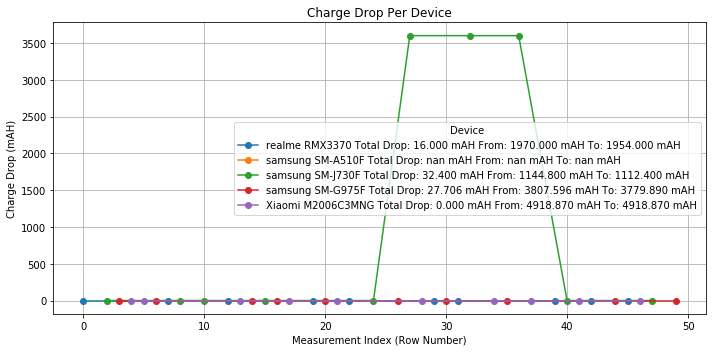

In [67]:
def generate_charge_drop_plot(df):
    """Plots the charge drop for each device without modifying the original DataFrame."""

    # Calculate charge drop (without modifying df)
    charge_drops = df.copy()
    charge_drops["charge_drop"] = charge_drops["charge_before"] - charge_drops["charge_after"]

    plt.figure(figsize=(10, 5))

    # Plot each device's charge drop separately and add cumulative information to the legend
    for device in df["device"].unique():
        subset = charge_drops[charge_drops["device"] == device]

        # Calculate cumulative charge consumption (first charge_before and last charge_after)
        first_charge_before = subset["charge_before"].iloc[0] / 1000
        last_charge_after = subset["charge_after"].iloc[-1] / 1000
        total_charge_drop = first_charge_before - last_charge_after

        # Add the information as a comment/legend entry
        label = (
            f"{device} "
            f"Total Drop: {total_charge_drop:.3f} mAH "
            f"From: {first_charge_before:.3f} mAH "
            f"To: {last_charge_after:.3f} mAH"
        )
        # Plot the charge drop
        plt.plot(subset.index, subset["charge_drop"], marker='o', linestyle='-', label=label)

    plt.xlabel("Measurement Index (Row Number)")
    plt.ylabel("Charge Drop (mAH)")
    plt.title("Charge Drop Per Device")
    plt.legend(title="Device")
    plt.tight_layout()
    plt.grid()
    plt.show()
    
generate_charge_drop_plot(energy_df)

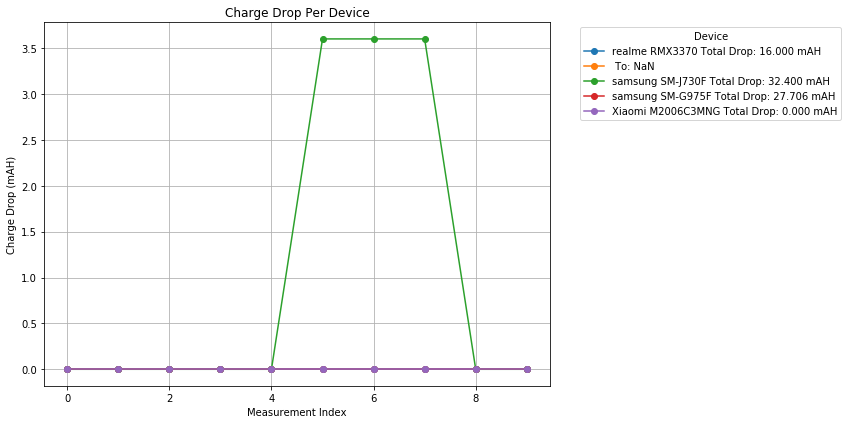

In [70]:
def generate_charge_drop_plot(df):
    """Plots the charge drop for each device without modifying the original DataFrame."""
    
    # Create a copy and calculate charge drop, handling NaN values
    charge_drops = df.copy()
    charge_drops["charge_drop"] = (charge_drops["charge_before"] - charge_drops["charge_after"]) / 1000  # Convert to mAH
    
    plt.figure(figsize=(12, 6))
    
    # Get unique devices
    unique_devices = charge_drops["device"].unique()
    
    # Plot each device's charge drop
    for device in unique_devices:
        subset = charge_drops[charge_drops["device"] == device].reset_index(drop=True)
        
        # Calculate cumulative charge consumption, handling NaN
        first_charge_before = subset["charge_before"].iloc[0] / 1000 if not pd.isna(subset["charge_before"].iloc[0]) else np.nan
        last_charge_after = subset["charge_after"].iloc[-1] / 1000 if not pd.isna(subset["charge_after"].iloc[-1]) else np.nan
        
        # Handle NaN in total charge drop calculation
        total_charge_drop = first_charge_before - last_charge_after if not (pd.isna(first_charge_before) or pd.isna(last_charge_after)) else np.nan
        
        # Create label with NaN handling
        label = (
            f"{device} "
            f"Total Drop: {total_charge_drop:.3f} mAH" if not pd.isna(total_charge_drop) else "Total Drop: NaN" 
            f" From: {first_charge_before:.3f} mAH" if not pd.isna(first_charge_before) else " From: NaN" 
            f" To: {last_charge_after:.3f} mAH" if not pd.isna(last_charge_after) else " To: NaN"
        )
        
        # Plot the charge drop, masking NaN values
        valid_mask = ~subset["charge_drop"].isna()
        if valid_mask.any():  # Only plot if there are valid values
            plt.plot(
                subset.index[valid_mask], 
                subset["charge_drop"][valid_mask], 
                marker='o', 
                linestyle='-', 
                label=label
            )
        else:
            # Add to legend even if no valid data points
            plt.plot([], [], marker='o', linestyle='-', label=label)

    plt.xlabel("Measurement Index")
    plt.ylabel("Charge Drop (mAH)")
    plt.title("Charge Drop Per Device")
    
    # Adjust legend
    plt.legend(title="Device", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    
    # Show plot
    plt.show()

# Call the function
generate_charge_drop_plot(energy_df)

Unique devices found: ['realme RMX3370' 'samsung SM-A510F' 'samsung SM-J730F' 'samsung SM-G975F'
 'Xiaomi M2006C3MNG']
Number of devices: 5

Data for realme RMX3370:
    n_round  charge_before  charge_after  charge_drop
0         1      1970000.0     1970000.0          0.0
7         2      1968000.0     1968000.0          0.0
12        3      1968000.0     1968000.0          0.0
19        4      1966000.0     1966000.0          0.0
22        5      1964000.0     1964000.0          0.0
29        6      1962000.0     1962000.0          0.0
31        7      1960000.0     1960000.0          0.0
39        8      1958000.0     1958000.0          0.0
42        9      1956000.0     1956000.0          0.0
45       10      1954000.0     1954000.0          0.0

Data for samsung SM-A510F:
    n_round  charge_before  charge_after  charge_drop
1         1            NaN           NaN          NaN
9         2            NaN           NaN          NaN
11        3            NaN           NaN          

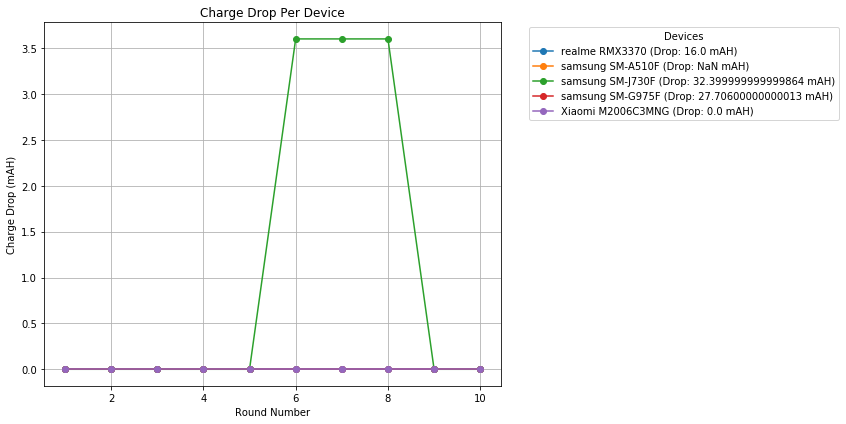

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def generate_charge_drop_plot(df):
    """Plots the charge drop for each device without modifying the original DataFrame."""
    
    # Create a copy and calculate charge drop in mAH
    charge_drops = df.copy()
    charge_drops["charge_drop"] = (charge_drops["charge_before"] - charge_drops["charge_after"]) / 1000
    
    # Debugging: Print unique devices and their data
    print("Unique devices found:", charge_drops["device"].unique())
    print("Number of devices:", len(charge_drops["device"].unique()))
    for device in charge_drops["device"].unique():
        print(f"\nData for {device}:")
        print(charge_drops[charge_drops["device"] == device][["n_round", "charge_before", "charge_after", "charge_drop"]])
    
    plt.figure(figsize=(12, 6))
    
    # Plot each device's charge drop
    for device in charge_drops["device"].unique():
        subset = charge_drops[charge_drops["device"] == device]
        
        # Calculate cumulative charge info
        first_charge_before = subset["charge_before"].iloc[0] / 1000 if pd.notna(subset["charge_before"].iloc[0]) else np.nan
        last_charge_after = subset["charge_after"].iloc[-1] / 1000 if pd.notna(subset["charge_after"].iloc[-1]) else np.nan
        total_charge_drop = first_charge_before - last_charge_after if pd.notna(first_charge_before) and pd.notna(last_charge_after) else np.nan
        
        # Create label
        label = f"{device} (Drop: {total_charge_drop if pd.notna(total_charge_drop) else 'NaN'} mAH)"
        
        # Use n_round if it varies, otherwise use index
        x_data = subset["n_round"] if len(subset["n_round"].unique()) > 1 else subset.index
        y_data = subset["charge_drop"]
        
        # Plot only non-NaN values
        valid_mask = ~y_data.isna()
        if valid_mask.any():
            plt.plot(
                x_data[valid_mask],
                y_data[valid_mask],
                marker='o',
                linestyle='-',
                label=label
            )
        else:
            # Ensure device appears in legend even with no valid data
            plt.plot([], [], marker='o', linestyle='-', label=label)
    
    # Customize plot
    plt.xlabel("Round Number" if len(charge_drops["n_round"].unique()) > 1 else "Measurement Index")
    plt.ylabel("Charge Drop (mAH)")
    plt.title("Charge Drop Per Device")
    plt.legend(title="Devices", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    
    # Add note if all drops are zero or NaN
    if charge_drops["charge_drop"].fillna(0).eq(0).all():
        plt.text(0.5, 0.5, "Note: All charge drops are zero or NaN", 
                transform=plt.gca().transAxes, 
                ha='center', va='center', 
                bbox=dict(facecolor='white', alpha=0.8))
    
    plt.show()

# Call with your DataFrame
generate_charge_drop_plot(energy_df)